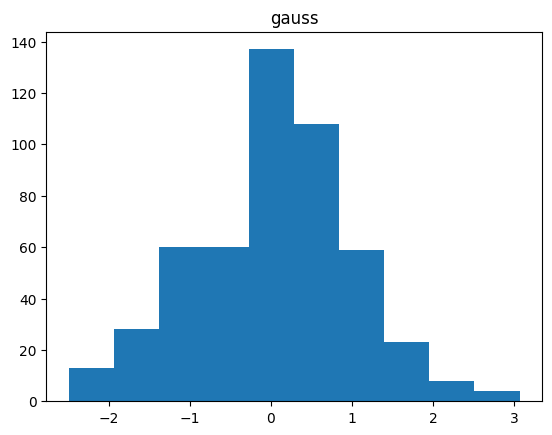

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import gauss 

l= [ gauss(0,1) for i in range(500)]
plt.figure
plt.hist(l)
plt.title("gauss")
plt.show()


In [70]:
!curl -o GLT_filterd.csv https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 12.1M    0 38584    0     0  55954      0  0:03:47 --:--:--  0:03:47 56081
 39 12.1M   39 4925k    0     0  4445k      0  0:00:02  0:00:01  0:00:01 4449k
100 12.1M  100 12.1M    0     0  7981k      0  0:00:01  0:00:01 --:--:-- 7988k


In [71]:
import csv 

db= [[],[],[],[],[],[]]

with open("GLT_filterd.csv") as f:
    reader=csv.reader(f)
    header=next(reader)
    for rows in reader:
        for j in range(6):
            db[j].append(rows[j])
print(db[1][:10])

db[1]=[float(x) if x!='' else '' for x in db[1] ]

print(values[:10])

['26.704', '27.434', '', '26.14', '25.427', '24.844', '24.058000000000003', '23.576', '', '25.263']
[26.704, 27.434, 26.787, 26.14, 25.427, 24.844, 24.058000000000003, 23.576, 24.4195, 25.263]


In [ ]:
def preceding(values, i):
    preceding=0
    if(values[i-1]!=''):
        preceding=values[i-1]
    else:
        for j in range(i):
            if(values[i-j]!=''):
                preceding=values[i-j]
                break
    return preceding

def succesive(values,i):
     succesive=0
     if(values[i+1]!=''):
            succesive=values[i+1]
     else:
        for j in range(len(values)-i):
            if(values[i+j]!=''):
                succesive=values[i+j]
                break
     return succesive



def missing_value_correction(values):

    for i in range(len(values)):
        if values[i] == '':
            if i == 0:
                prev_value = 0
                next_value = succesive(values, i)
            
            elif i == len(values) - 1:
                prev_value = preceding(values, i)
                next_value = 0

            else:
                prev_value = preceding(values, i)
                next_value = succesive(values, i)

            values[i] = (prev_value + next_value) / 2  # Fill missing value

   
    print("withoutmissing",values[0:20])
    
    


In [ ]:
temp=[]
cities= list(set(db[3]))
print(cities)
for z in range(len(cities)):
    v= [x for k, x in enumerate(db[1]) if db[3][k]==cities[z]] 
    temp.append(v)
    print("with missing value",v[:20])
    missing_value_correction(v)
    i=0
    for o ,m in enumerate(db[1]):
        if db[3][o]==cities[z]:
            db[1][o]=v[i]
            i+=1;
    print(cities[z])

print("db",db[1][:20])
    

In [ ]:
cityTempDict= {cities[i] : temp[i] for i in range(len(cities))}
print(cityTempDict.keys())


def topN(city,n):
    


    

dict_keys(['Cape Town', 'Lagos', 'Jaipur', 'Dakar', 'Aleppo', 'Baghdad', 'Dar Es Salaam', 'Guangzhou', 'Alexandria', 'Madrid', 'Paris', 'Lakhnau', 'Ho Chi Minh City', 'BogotÃ¡', 'Shanghai', 'Calcutta', 'Harare', 'Lahore', 'Kiev', 'Salvador', 'Mogadishu', 'Jiddah', 'Chengdu', 'Mexico', 'Los Angeles', 'Istanbul', 'Durban', 'Jakarta', 'SÃ£o Paulo', 'Belo Horizonte', 'Sydney', 'Toronto', 'Ankara', 'Abidjan', 'Surabaya', 'Ibadan', 'Nagoya', 'Jinan', 'Riyadh', 'Pune', 'Seoul', 'Taiyuan', 'Fortaleza', 'Nairobi', 'Tangshan', 'Kinshasa', 'Singapore', 'Santiago', 'Manila', 'Changchun', 'Kano', 'New Delhi', 'Madras', 'Dhaka', 'Wuhan', 'Chicago', 'Delhi', 'Nanjing', 'Rio De Janeiro', 'Rangoon', 'Peking', 'Karachi', 'Montreal', 'Harbin', 'Kabul', 'Tokyo', 'Cali', 'Rome', 'Chongqing', 'Bangkok', 'Mashhad', 'Xian', 'London', 'Kanpur', 'New York', 'Dalian', 'Taipei', 'Tianjin', 'Addis Abeba', 'Ahmadabad', 'Hyderabad', 'Santo Domingo', 'Lima', 'Bangalore', 'Moscow', 'Casablanca', 'Gizeh', 'Bombay', 'Na